In [39]:
# Unsupervised Learning - Clustering
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, adjusted_rand_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.decomposition import PCA

# Load dataset
df = pd.read_csv('../results/selected_features_dataset.csv')

# Separate features and target (we'll use target only for comparison)
X = df.drop('target', axis=1)
y_true = df['target']

print(f"Dataset shape for clustering: {X.shape}")


Dataset shape for clustering: (303, 8)



1. K-MEANS CLUSTERING


Text(0, 0.5, 'Inertia')

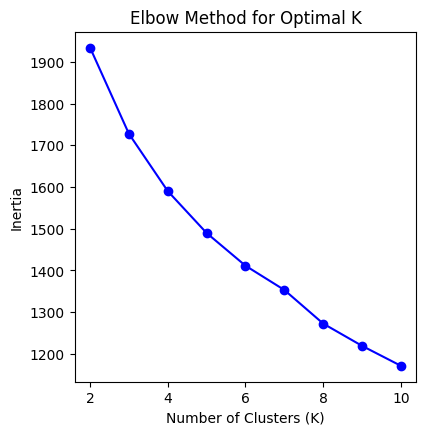

In [40]:
# Standardize features for clustering
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 1. K-Means Clustering
print("\n1. K-MEANS CLUSTERING")
print("="*30)

# Determine optimal K using elbow method
k_range = range(2, 11)
inertias = []
silhouette_scores = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))

# Plot elbow curve and silhouette scores
plt.figure(figsize=(15, 10))

# Elbow method
plt.subplot(2, 3, 1)
plt.plot(k_range, inertias, 'bo-')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')

Optimal K (by silhouette score): 2
K-Means Results (K=2):
  Silhouette Score: 0.2032
  Adjusted Rand Index: 0.4207


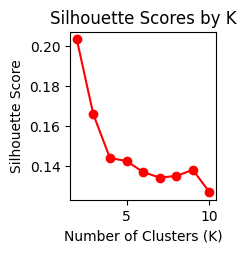

In [41]:

# Silhouette scores
plt.subplot(2, 3, 2)
plt.plot(k_range, silhouette_scores, 'ro-')
plt.title('Silhouette Scores by K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')

# Choose optimal K (highest silhouette score)
optimal_k = k_range[np.argmax(silhouette_scores)]
print(f"Optimal K (by silhouette score): {optimal_k}")

# Apply K-Means with optimal K
kmeans_optimal = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
kmeans_labels = kmeans_optimal.fit_predict(X_scaled)

# Evaluate K-Means
kmeans_silhouette = silhouette_score(X_scaled, kmeans_labels)
kmeans_ari = adjusted_rand_score(y_true, kmeans_labels)

print(f"K-Means Results (K={optimal_k}):")
print(f"  Silhouette Score: {kmeans_silhouette:.4f}")
print(f"  Adjusted Rand Index: {kmeans_ari:.4f}")



2. HIERARCHICAL CLUSTERING
Hierarchical Clustering Results:
  Silhouette Score: 0.1510
  Adjusted Rand Index: 0.2524


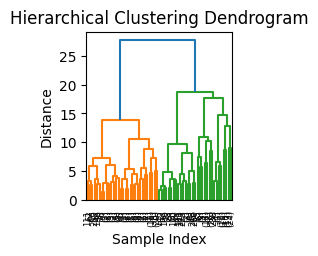

In [42]:

# 2. Hierarchical Clustering
print("\n2. HIERARCHICAL CLUSTERING")
print("="*35)

# Generate linkage matrix
linkage_matrix = linkage(X_scaled, method='ward')

# Plot dendrogram
plt.subplot(2, 3, 3)
dendrogram(linkage_matrix, truncate_mode='level', p=5)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')

# Apply hierarchical clustering
hierarchical = AgglomerativeClustering(n_clusters=optimal_k, linkage='ward')
hierarchical_labels = hierarchical.fit_predict(X_scaled)

# Evaluate Hierarchical Clustering
hierarchical_silhouette = silhouette_score(X_scaled, hierarchical_labels)
hierarchical_ari = adjusted_rand_score(y_true, hierarchical_labels)

print(f"Hierarchical Clustering Results:")
print(f"  Silhouette Score: {hierarchical_silhouette:.4f}")
print(f"  Adjusted Rand Index: {hierarchical_ari:.4f}")


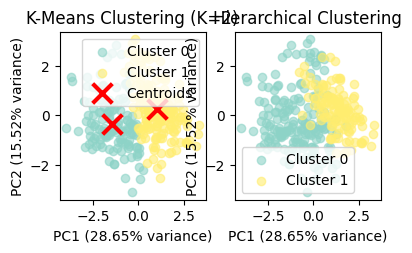

In [43]:
# 3. Visualize clusters using PCA
pca_2d = PCA(n_components=2, random_state=42)
X_pca = pca_2d.fit_transform(X_scaled)

# K-Means clusters visualization
plt.subplot(2, 3, 4)
colors = plt.cm.Set3(np.linspace(0, 1, optimal_k))
for i in range(optimal_k):
    mask = kmeans_labels == i
    plt.scatter(X_pca[mask, 0], X_pca[mask, 1], c=[colors[i]], label=f'Cluster {i}', alpha=0.6)
# Project cluster centers to PCA space
centers_pca = pca_2d.transform(kmeans_optimal.cluster_centers_)
plt.scatter(centers_pca[:, 0], centers_pca[:, 1],
            c='red', marker='x', s=200, linewidths=3, label='Centroids')
plt.title(f'K-Means Clustering (K={optimal_k})')
plt.xlabel(f'PC1 ({pca_2d.explained_variance_ratio_[0]:.2%} variance)')
plt.ylabel(f'PC2 ({pca_2d.explained_variance_ratio_[1]:.2%} variance)')
plt.legend()

# Hierarchical clusters visualization
plt.subplot(2, 3, 5)
for i in range(optimal_k):
    mask = hierarchical_labels == i
    plt.scatter(X_pca[mask, 0], X_pca[mask, 1], c=[colors[i]], label=f'Cluster {i}', alpha=0.6)
plt.title('Hierarchical Clustering')
plt.xlabel(f'PC1 ({pca_2d.explained_variance_ratio_[0]:.2%} variance)')
plt.ylabel(f'PC2 ({pca_2d.explained_variance_ratio_[1]:.2%} variance)')
plt.legend()

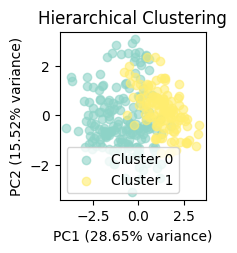

In [44]:
# Hierarchical clusters visualization
plt.subplot(2, 3, 5)
for i in range(optimal_k):
    mask = hierarchical_labels == i
    plt.scatter(X_pca[mask, 0], X_pca[mask, 1], c=[colors[i]], label=f'Cluster {i}', alpha=0.6)
plt.title('Hierarchical Clustering')
plt.xlabel(f'PC1 ({pca_2d.explained_variance_ratio_[0]:.2%} variance)')
plt.ylabel(f'PC2 ({pca_2d.explained_variance_ratio_[1]:.2%} variance)')
plt.legend()

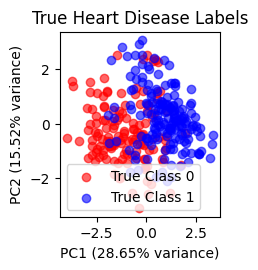

In [45]:
# True labels visualization for comparison
plt.subplot(2, 3, 6)
colors_true = ['red', 'blue']
for i in [0, 1]:
    mask = y_true == i
    plt.scatter(X_pca[mask, 0], X_pca[mask, 1], c=colors_true[i], 
               label=f'True Class {i}', alpha=0.6)
plt.title('True Heart Disease Labels')
plt.xlabel(f'PC1 ({pca_2d.explained_variance_ratio_[0]:.2%} variance)')
plt.ylabel(f'PC2 ({pca_2d.explained_variance_ratio_[1]:.2%} variance)')
plt.legend()

plt.tight_layout()
plt.show()

In [46]:
# 4. Cluster Analysis
print("\n3. CLUSTER ANALYSIS")
print("="*25)

# Add cluster labels to original dataframe for analysis
analysis_df = df.copy()
analysis_df['KMeans_Cluster'] = kmeans_labels
analysis_df['Hierarchical_Cluster'] = hierarchical_labels

# Analyze cluster characteristics
print("K-Means Cluster Characteristics:")
for cluster in range(optimal_k):
    cluster_data = analysis_df[analysis_df['KMeans_Cluster'] == cluster]
    print(f"\nCluster {cluster} (n={len(cluster_data)}):")
    print(f"  Heart Disease Rate: {cluster_data['target'].mean():.3f}")
    print(f"  Mean Age: {cluster_data['age'].mean():.1f}" if 'age' in cluster_data.columns else "")
    
print(f"\nHierarchical Cluster Characteristics:")
for cluster in range(optimal_k):
    cluster_data = analysis_df[analysis_df['Hierarchical_Cluster'] == cluster]
    print(f"\nCluster {cluster} (n={len(cluster_data)}):")
    print(f"  Heart Disease Rate: {cluster_data['target'].mean():.3f}")
    print(f"  Mean Age: {cluster_data['age'].mean():.1f}" if 'age' in cluster_data.columns else "")

# Save clustering results
clustering_results = {
    'optimal_k': optimal_k,
    'kmeans_silhouette': kmeans_silhouette,
    'kmeans_ari': kmeans_ari,
    'hierarchical_silhouette': hierarchical_silhouette,
    'hierarchical_ari': hierarchical_ari
}



3. CLUSTER ANALYSIS
K-Means Cluster Characteristics:

Cluster 0 (n=127):
  Heart Disease Rate: 0.165
  Mean Age: 0.5

Cluster 1 (n=176):
  Heart Disease Rate: 0.818
  Mean Age: -0.3

Hierarchical Cluster Characteristics:

Cluster 0 (n=177):
  Heart Disease Rate: 0.322
  Mean Age: 0.3

Cluster 1 (n=126):
  Heart Disease Rate: 0.857
  Mean Age: -0.5


In [47]:
# Save cluster labels
cluster_df = pd.DataFrame({
    'KMeans_Cluster': kmeans_labels,
    'Hierarchical_Cluster': hierarchical_labels,
    'True_Label': y_true
})
cluster_df.to_csv('../results/clustering_results.csv', index=False)

print(f"\n✔️ Clustering analysis completed")
print(f"✔️ Cluster visualizations created")
print(f"✔️ Results saved to clustering_results.csv")


✔️ Clustering analysis completed
✔️ Cluster visualizations created
✔️ Results saved to clustering_results.csv
